# Latihan Thermal Neutron Scattering

In [1]:
import openmc
%matplotlib inline

In [2]:
# weight fraction "wo"
UO2F2 = openmc.Material(name="UO2F")
UO2F2.add_nuclide("H1", 5.7058E-2, "ao")
UO2F2.add_nuclide("O16", 3.2929E-2, "ao")
UO2F2.add_nuclide("F19", 4.3996E-3, "ao")
UO2F2.add_nuclide("U238", 2.0909E-3, "ao")
UO2F2.add_nuclide("U235", 1.0889E-4, "ao")
UO2F2.set_density("atom/b-cm", 9.6586E-2)
# UO2F2.add_s_alpha_beta("c_H_in_H2O")
# UO2F2.set_temperature= 300

Air = openmc.Material(name="Air")
Air.add_element("H", 2)
Air.add_element("O", 1)
Air.set_density('g/cc', 1.0)
Air.add_s_alpha_beta("c_H_in_H2O")

Al = openmc.Material(name="Aluminium")
Al.add_element("Al", 1)
Al.set_density("g/cc", 2.7)

materials = openmc.Materials([UO2F2, Air, Al])
materials.export_to_xml()

material_colors = {UO2F2 : 'black', Air : 'blue', Al : 'red'}
# !cat materials.xml

In [3]:
UO2F_Cylinder = openmc.ZCylinder(r=20.12)
Al_Cylinder = openmc.ZCylinder(r=20.2787, boundary_type='vacuum')
b_UO2F = openmc.ZPlane(z0=0)
t_UO2F = openmc.ZPlane(z0=100)
b_Al = openmc.ZPlane(z0=-0.1587, boundary_type='vacuum')
t_Al = openmc.ZPlane(z0=110, boundary_type='vacuum')

Fuel = -UO2F_Cylinder & +b_UO2F & -t_UO2F
Clad = (+UO2F_Cylinder & -Al_Cylinder & +b_Al & -t_Al) | (-UO2F_Cylinder & +b_Al & -b_UO2F)
# Moderator = +Al_Cylinder & +b_Al & -t_Al
Void = -UO2F_Cylinder & +t_UO2F & -t_Al

UO2F_cell = openmc.Cell(fill=UO2F2, region=(Fuel))
Al_cell = openmc.Cell(fill=Al, region=(Clad))
# Air_cell = openmc.Cell(fill=Air, region=(Moderator))
Void_cell = openmc.Cell(region=(Void))

geom = openmc.Geometry([UO2F_cell, Al_cell, Void_cell]) # , Air_cell
geom.export_to_xml()

!cat geometry.xml

<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell id="1" material="1" region="-1 3 -4" universe="1"/>
  <cell id="2" material="3" region="(1 -2 5 -6) | (-1 5 -3)" universe="1"/>
  <cell id="3" material="void" region="-1 4 -6" universe="1"/>
  <surface coeffs="0.0 0.0 20.12" id="1" type="z-cylinder"/>
  <surface boundary="vacuum" coeffs="0.0 0.0 20.2787" id="2" type="z-cylinder"/>
  <surface coeffs="0" id="3" type="z-plane"/>
  <surface coeffs="100" id="4" type="z-plane"/>
  <surface boundary="vacuum" coeffs="-0.1587" id="5" type="z-plane"/>
  <surface boundary="vacuum" coeffs="110" id="6" type="z-plane"/>
</geometry>


<Axes: xlabel='x [cm]', ylabel='z [cm]'>

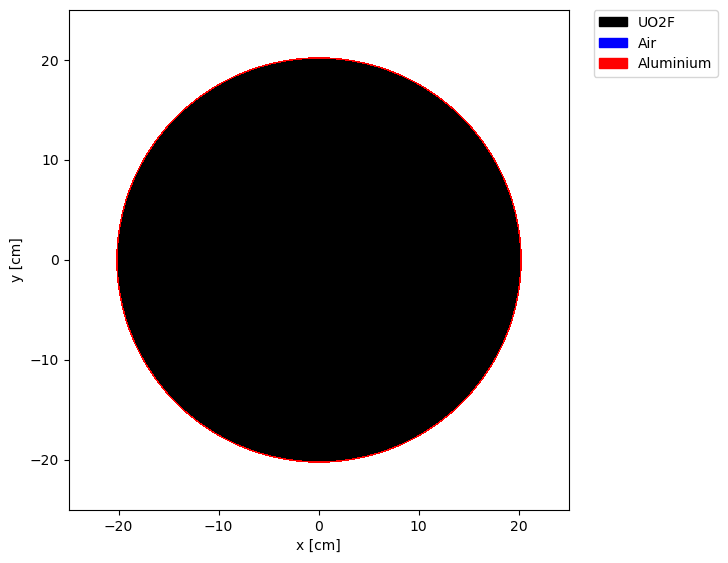

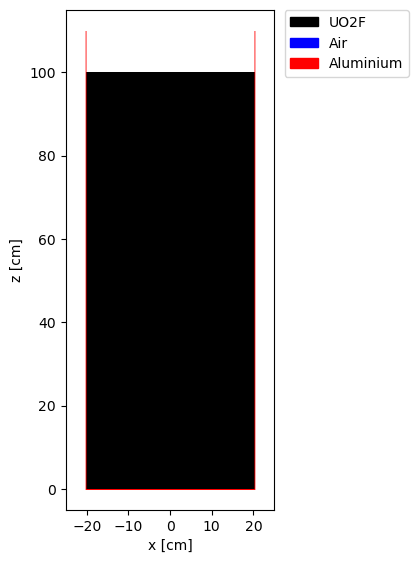

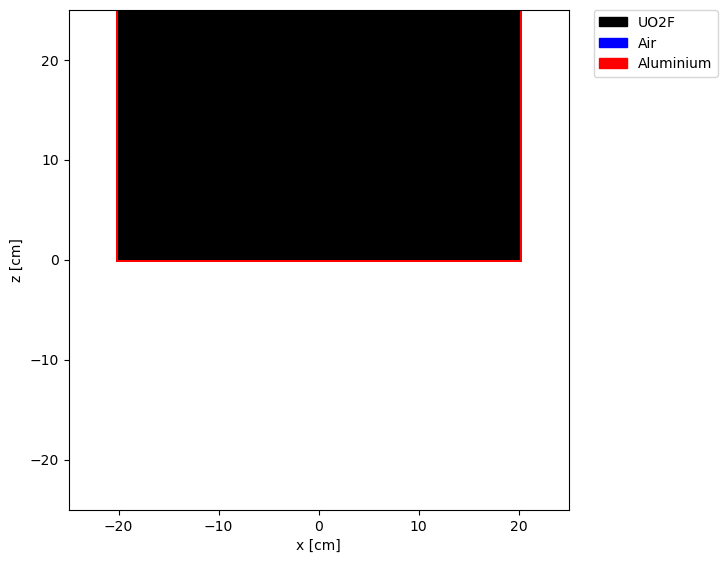

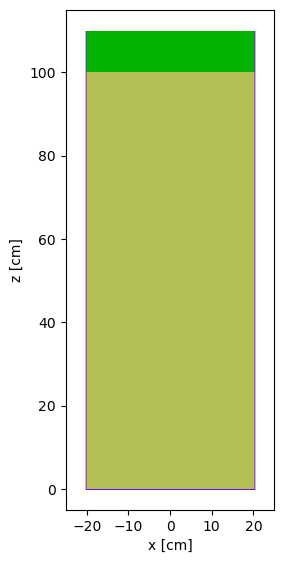

In [4]:
geom.plot(basis='xy', width=(50,50), origin=(0,0,20), pixels=(500,500), color_by='material', colors=material_colors, legend= True)
geom.plot(basis='xz', width=(50,120), origin=(0,0,55), pixels=(500,500), color_by='material', colors=material_colors, legend= True)
geom.plot(basis='xz', width=(50,50), origin=(0,0,0), pixels=(500,500), color_by='material', colors=material_colors, legend= True)
geom.plot(basis='xz', width=(50,120), origin=(0,0,55), pixels=(500,500), color_by='cell')


In [5]:
# Pengaturan simulasi
settings = openmc.Settings()
settings.particles = 5000         # Jumlah neutron per generasi
settings.inactive = 50            # Generasi yang diabaikan
settings.batches = 250            # Total generasi

# Posisi sumber neutron
source = openmc.Source()
source.space = openmc.stats.Point((0, 0, 50.0))  
settings.source = source

settings.export_to_xml()


/home/dhiyasalmas/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:656: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [6]:
# Run
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################